In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('datasetCoronavirus.csv')
# random datafram
df = df.sample(frac=1).reset_index(drop=True)

In [3]:
df.head()

,id,name,description,number of features,sequence,label
0,QII57335.1,QII57335.1,QII57335.1 nucleocapsid phosphoprotein [Severe...,0,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,beta
1,AFD29209.1,AFD29209.1,AFD29209.1 spike glycoprotein [Sparrow coronav...,0,MQGALLITFIAVVTSSPLADKILDFLTFPEAHAYLFPQSRMVRNIE...,delta
2,ABN10842.1,ABN10842.1,ABN10842.1 hypothetical protein [Tylonycteris ...,0,MSIVLRLLSVLKHQQNKMQLDLSVNSYKLLDYSMEWSSDSVVLPPT...,beta
3,QHU36824.1,QHU36824.1,QHU36824.1 surface glycoprotein [Severe acute ...,0,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,beta
4,NC_030292.1,NC_030292.1,NC_030292.1 Ferret coronavirus isolate FRCoV-N...,0,ACTTTTAAAGATAAGTGAGTGTAGCGTAGCTGCCTACTTTCTTTAA...,alpha


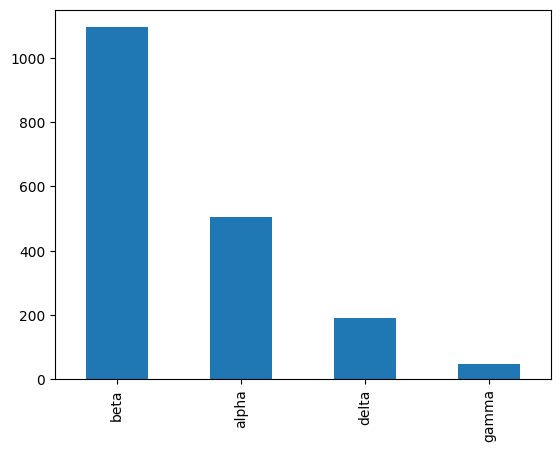

In [14]:
# tampilkan grafik jumlah per label
df['label'].value_counts().plot(kind='bar')
plt.show()

In [4]:
X = df['sequence'].values
Y = df['label']

In [5]:
# extract features from sequences using count amino acids percentage in each sequence
def extract_features(X):
    features = []
    for sequence in X:
        feature = []
        for amino_acid in 'ACDEFGHIKLMNPQRSTVWY':
            feature.append(sequence.count(amino_acid) / len(sequence))
        features.append(feature)
    return features

In [6]:
# extract features from sequences
X = extract_features(X)

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
# train model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [9]:
# predict
y_pred = model.predict(X_test)

In [10]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 13  64   5   8]
 [ 19 161  36   5]
 [  0  16  27   0]
 [  0   0   0  13]]


<function matplotlib.pyplot.show(close=None, block=None)>

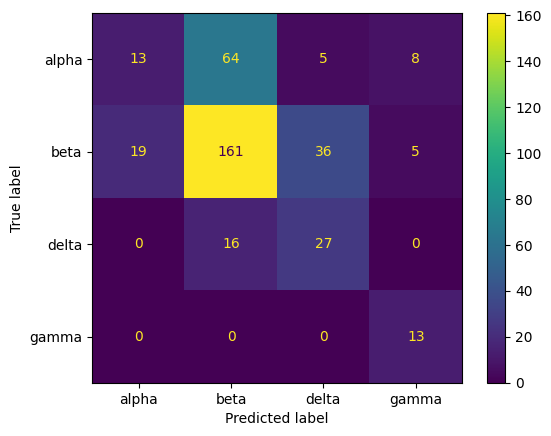

In [12]:
# plot confussion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show


In [13]:
# accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5831062670299727


In [ ]:
import pickle

# save model
pickle.dump(model, open('NBcoronavirus.pkl','wb'))

In [ ]:
# save label encoder
pickle.dump(label_encoder, open('label_encoder.pkl','wb'))

# save one hot encoder
pickle.dump(onehot_encoder, open('onehot_encoder.pkl','wb'))